In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cust_df = pd.read_excel('./Dataset/p1-customers.xlsx')
cust_df.sample(10)

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
1972,Judith Meisner,Credit Card Only,709,7770 W 8th Ave,Lakewood,CO,80214,235.36,106,Yes,1,3
2174,R Carins,Credit Card Only,2081,8760 Carr Loop,Arvada,CO,80005,859.17,108,No,6,8
683,Laura Kurschinski,Store Mailing List,1948,1438 Amherst St,Superior,CO,80027,172.27,109,No,2,2
701,Diane King,Store Mailing List,2055,10835 E Wesley Pl,Aurora,CO,80014,149.07,100,No,2,2
594,Audrey Fulkerson,Store Mailing List,1696,276 Moline Ct,Aurora,CO,80010,258.54,105,No,3,7
655,Annette Stiner,Store Mailing List,1882,60 Ivy St,Denver,CO,80220,232.92,101,Yes,1,7
938,Nancy Fulsom,Store Mailing List,2767,2403 Chase St,Edgewater,CO,80214,195.57,107,No,1,4
449,Nancy Marts,Store Mailing List,1222,7005 W 35th Ave,Wheat Ridge,CO,80033,259.56,106,No,1,8
1431,Paula Martinez,Loyalty Club Only,792,2870 S Richfield Way,Aurora,CO,80013,404.43,104,No,4,2
768,Prabhat Pradhan,Store Mailing List,2283,90 S Fairfax St,Denver,CO,80246,132.99,100,No,1,1


In [4]:
cust_df.State.value_counts()

CO    2375
Name: State, dtype: int64

In [5]:
# check to see if there are some customers that buys a lot 
cust_df.Name.value_counts().head(15)

Jessie Ives                2
Jane Nelson                2
Rebecca Jones              2
Linda Smith                2
Jennifer Davis             2
Lynn Pacheco               2
Kelly Carlson              2
Elizabeth Harris           2
Maria Gonzalez             2
Elena Fierro               1
Leticia Tellez-Meinecke    1
Vivian Gaulden             1
Karina Taylor              1
Tracy Acosta               1
Deanne Cardin              1
Name: Name, dtype: int64

In [6]:
# Chech to see if there is duplicated value in the dataset
assert cust_df.duplicated().sum() == 0

In [7]:
# Check to see if there is any null value in any of the rows
assert cust_df.isnull().any(axis=1).sum() == 0

In [8]:
# Check to see the individual values in the customer segement
cust_df.Customer_Segment.value_counts()

Store Mailing List              1108
Loyalty Club Only                579
Credit Card Only                 494
Loyalty Club and Credit Card     194
Name: Customer_Segment, dtype: int64

The Customer_Segment should be a categorical type

In [9]:
# check the number of cities present
print(cust_df.City.value_counts())
len(cust_df.City.value_counts())

Denver               750
Aurora               493
Arvada               247
Lakewood             217
Broomfield           125
Westminster           85
Centennial            78
Littleton             72
Englewood             56
Wheat Ridge           54
Thornton              35
Parker                27
Northglenn            24
Highlands Ranch       23
Golden                19
Greenwood Village     14
Edgewater             12
Commerce City         10
Superior               9
Morrison               7
Lafayette              5
Louisville             4
Boulder                3
Castle Pines           2
Brighton               2
Henderson              1
Lone Tree              1
Name: City, dtype: int64


27

In [10]:
#  whether there are omre than one state represented in the dataset 
cust_df.State.value_counts()

CO    2375
Name: State, dtype: int64

The state variable can be removed, since all the data are from just one state 

In [11]:
#checking the number of zip codes that exist in the dataset
cust_df.ZIP.value_counts().head(10)

80013    127
80219     93
80015     90
80012     88
80020     87
80004     80
80226     71
80014     71
80005     71
80247     57
Name: ZIP, dtype: int64

There are 86 zipcodes in the dataset

In [12]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        2375 non-null   object 
 1   Customer_Segment            2375 non-null   object 
 2   Customer_ID                 2375 non-null   int64  
 3   Address                     2375 non-null   object 
 4   City                        2375 non-null   object 
 5   State                       2375 non-null   object 
 6   ZIP                         2375 non-null   int64  
 7   Avg_Sale_Amount             2375 non-null   float64
 8   Store_Number                2375 non-null   int64  
 9   Responded_to_Last_Catalog   2375 non-null   object 
 10  Avg_Num_Products_Purchased  2375 non-null   int64  
 11  #_Years_as_Customer         2375 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 222.8+ KB


In [13]:
print(cust_df.Store_Number.value_counts(sort=False))
len(cust_df.Store_Number.value_counts(sort=False))

100    326
102     85
104    270
106    283
108    210
101    276
103    225
105    305
107    226
109    169
Name: Store_Number, dtype: int64


10

There are 10 stores in the data

In [14]:
cust_df.Responded_to_Last_Catalog.value_counts()

No     2204
Yes     171
Name: Responded_to_Last_Catalog, dtype: int64

Most of the time, there is no response to last clatalog

In [15]:
cust_df.Avg_Num_Products_Purchased.value_counts()

1     858
2     289
3     277
4     240
5     235
6     216
7     164
8      36
11     10
10      9
12      8
9       7
16      7
17      5
15      3
19      2
21      2
22      2
13      1
20      1
18      1
14      1
26      1
Name: Avg_Num_Products_Purchased, dtype: int64

In [16]:
cust_df = cust_df.rename(columns={'#_Years_as_Customer': 'No_of_Years_as_Customer'})

In [17]:
cust_df.columns

Index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'State',
       'ZIP', 'Avg_Sale_Amount', 'Store_Number', 'Responded_to_Last_Catalog',
       'Avg_Num_Products_Purchased', 'No_of_Years_as_Customer'],
      dtype='object')

In [18]:
cust_df.No_of_Years_as_Customer.value_counts()

2    316
8    313
6    307
1    297
5    294
3    285
4    284
7    279
Name: No_of_Years_as_Customer, dtype: int64

## Data Cleaning
#### Cleanliness issues
* The Customer_Segment, Store_Number and Responded_to_Last_Catalog are wrongly saved as object instead of category
#### Tidiness issues 
* The state and zip code are not important for this analysis


#### Define
Change Customer_Segment, Store_Number and Responded_to_Last_Catalog to categorical types

#### Code

In [19]:
col_names = ['Customer_Segment', 'Store_Number', 'Responded_to_Last_Catalog']
for col in col_names:
    cust_df[col] = cust_df[col].astype('category')

#### Test

In [20]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Name                        2375 non-null   object  
 1   Customer_Segment            2375 non-null   category
 2   Customer_ID                 2375 non-null   int64   
 3   Address                     2375 non-null   object  
 4   City                        2375 non-null   object  
 5   State                       2375 non-null   object  
 6   ZIP                         2375 non-null   int64   
 7   Avg_Sale_Amount             2375 non-null   float64 
 8   Store_Number                2375 non-null   category
 9   Responded_to_Last_Catalog   2375 non-null   category
 10  Avg_Num_Products_Purchased  2375 non-null   int64   
 11  No_of_Years_as_Customer     2375 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(4)
memory usage: 174.8+ KB


#### Define
Delete state from dataset

#### Code

In [21]:
cust_df = cust_df.drop(['State'], axis = 1)

#### Test

In [22]:
cust_df.columns

Index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'ZIP',
       'Avg_Sale_Amount', 'Store_Number', 'Responded_to_Last_Catalog',
       'Avg_Num_Products_Purchased', 'No_of_Years_as_Customer'],
      dtype='object')

In [23]:
cust_df.sample(10)

,Name,Customer_Segment,Customer_ID,Address,City,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,No_of_Years_as_Customer
1567,Diana Pastrana-Rivas,Loyalty Club Only,1492,3326 W Alaska Pl,Denver,80219,525.17,106,No,5,2
1580,Susan Albanese,Loyalty Club Only,1561,1375 S Hoyt St,Lakewood,80232,481.91,101,No,4,5
1504,Maria Arcalas,Loyalty Club Only,1146,19495 E Nassau Dr,Aurora,80013,311.14,100,No,3,6
1697,Regina Solano,Loyalty Club Only,2220,5220 Riverdale Ave,Denver,80229,334.66,103,No,3,7
2230,Wendy Phillips,Credit Card Only,2443,9240 Tennyson St,Westminster,80031,790.43,103,No,7,8
1292,Kelly Thorstad,Loyalty Club and Credit Card,3074,4205 E 119th Pl,Thornton,80233,1674.86,103,No,5,4
96,Stephenie Jarrett,Store Mailing List,278,292 Berthoud Trl,Broomfield,80020,75.35,109,No,1,3
1662,Deborah Wilson,Loyalty Club Only,1988,671 S Shoshone St,Denver,80223,303.12,107,No,2,3
2322,Susan Houston,Credit Card Only,3020,8862 Dudley St,Broomfield,80021,141.79,109,No,1,7
1321,Melissa Madsen,Loyalty Club Only,83,4442 W 68th Ave,Westminster,80030,482.01,106,No,4,7


### Interesting questions
* Which category of customer segment has the highest average sale
* Which of the city has the highest or the lowest average sale


## Univariate exploration

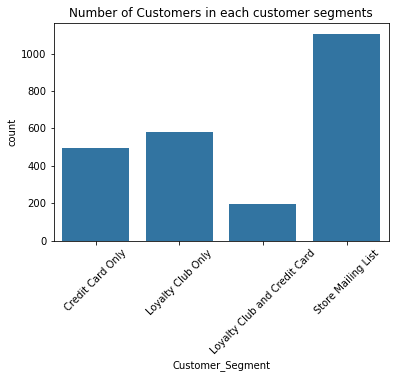

In [24]:
base_color = sns.color_palette()[0]
sns.countplot(data=cust_df, x = 'Customer_Segment', color=base_color);
plt.xticks(rotation=45)
plt.title('Number of Customers in each customer segments');

The store mailing list has the highest number of transaction while the loyalty club and credit card has the lowest

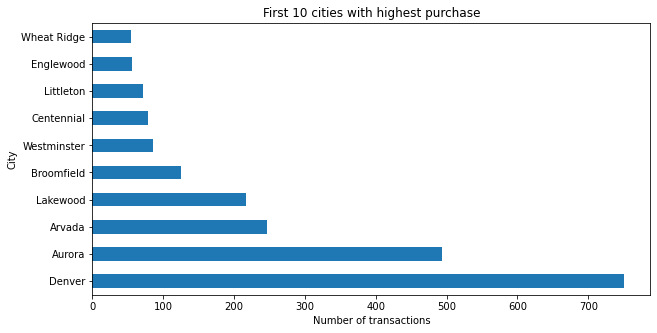

In [25]:
# Viewing the first ten cities with purchase
plt.figure(figsize=(10, 5))
cust_df.City.value_counts().head(10).plot(kind='barh')
plt.title('First 10 cities with highest purchase')
plt.xlabel('Number of transactions')
plt.ylabel('City');

Denver has the highest number of transactions

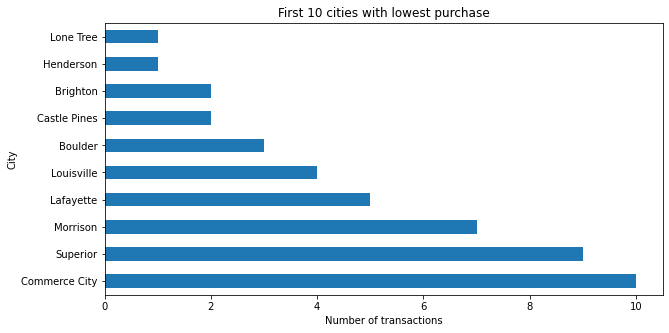

In [26]:
# Viewing the last ten cities with purchase
plt.figure(figsize=(10, 5))
cust_df.City.value_counts().tail(10).plot(kind='barh')
plt.title('First 10 cities with lowest purchase')
plt.xlabel('Number of transactions')
plt.ylabel('City');

Lone tree has the lowest number of transactions

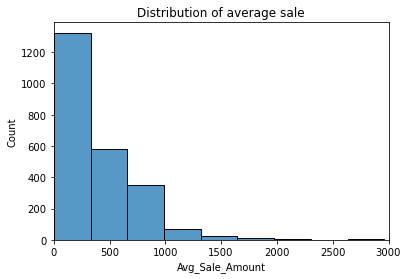

In [27]:
set_bins = np.linspace(cust_df.Avg_Sale_Amount.min(), cust_df.Avg_Sale_Amount.max(), 10)
sns.histplot(data=cust_df, x='Avg_Sale_Amount', bins=set_bins)
plt.title('Distribution of average sale')
plt.xlim(0,3000);

The distribution is right skewed, showing that there is posibility of outlier on the right

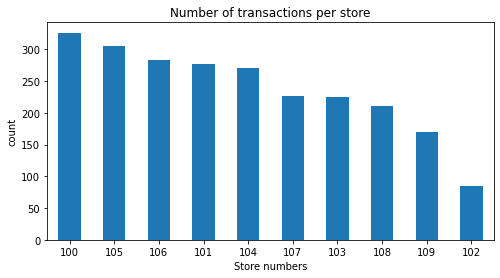

In [28]:
plt.figure(figsize=(8, 4))
cust_df.Store_Number.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Number of transactions per store')
plt.xlabel('Store numbers')
plt.ylabel('count');

The number of transactions per store

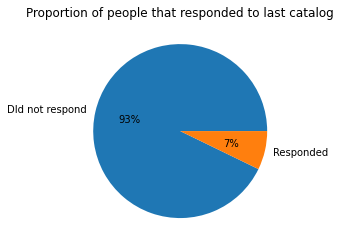

In [29]:
plt.pie(cust_df.Responded_to_Last_Catalog.value_counts(), labels = ['DId not respond', 'Responded '], autopct='%.0f%%' )
plt.title("Proportion of people that responded to last catalog");

There are more people that did not respond to their last catalog than those that attended to it

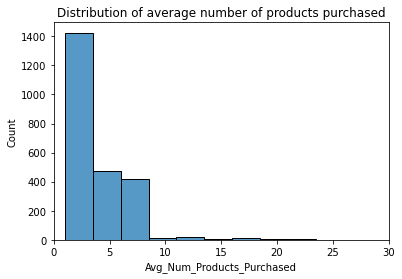

In [30]:
#set_bins = np.linspace(cust_df.Avg_Sale_Amount.min(), cust_df.Avg_Sale_Amount.max(), 10)
sns.histplot(data=cust_df, x='Avg_Num_Products_Purchased', bins = 10)
plt.title('Distribution of average number of products purchased')
plt.xlim(0,30);

Most of the purchase made are between 1 and 8

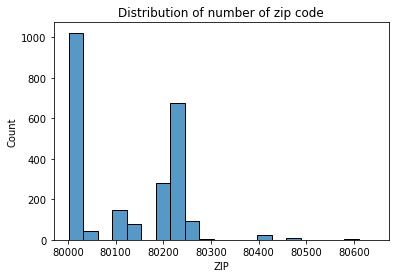

In [31]:
sns.histplot(data=cust_df, x='ZIP', color=base_color)
plt.title('Distribution of number of zip code');

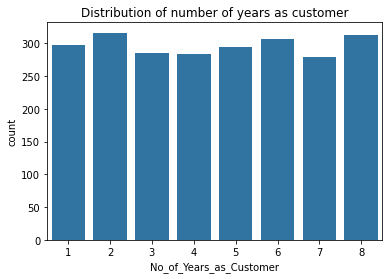

In [32]:
#set_bins = np.arange(1, 9, 1)
sns.countplot(data=cust_df, x='No_of_Years_as_Customer', color=base_color)
plt.title('Distribution of number of years as customer');

The difference in the different years are not so significant

## Bivariate Exploration

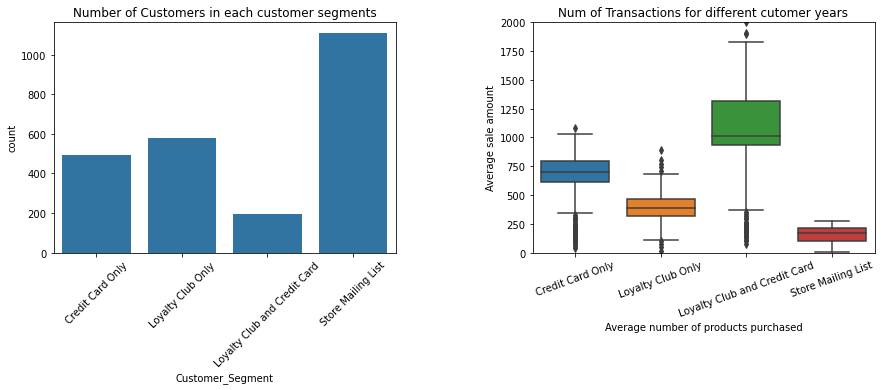

In [39]:
plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.countplot(data=cust_df, x = 'Customer_Segment', color=base_color);
plt.xticks(rotation=45)
plt.title('Number of Customers in each customer segments')

plt.subplot(1, 2, 2)
sns.boxplot(data=cust_df, x='Customer_Segment', y='Avg_Sale_Amount')
plt.ylim(0,2000)
plt.xlabel('Average number of products purchased')
plt.ylabel('Average sale amount')
plt.xticks(rotation=20)
plt.title('Distribution of average sale and avrage products purchased');



plt.title('Num of Transactions for different cutomer years')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

* Although the store mailing list has the highest customers segmet, its average sale amount is lower
* In the other way round, loyalty and credit card has the lowest number of customers but the highest average sale
* The third highest average sale is the credit card only.
* It suggests that credit card is an important variable that increses the average sale. Getting people to register in loyalty club and have them use credit card will surely increse sale

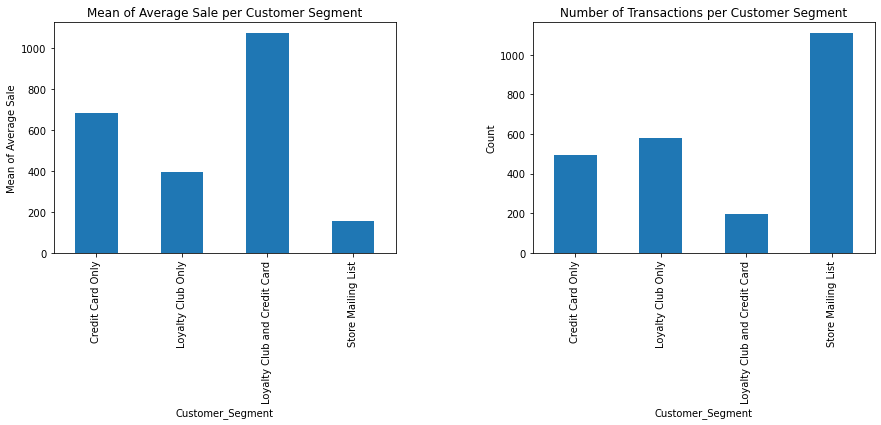

In [42]:
plt.subplot(1, 2, 1)
cust_df.groupby('Customer_Segment').mean()['Avg_Sale_Amount'].plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('Mean of Average Sale per Customer Segment')
plt.ylabel('Mean of Average Sale')

plt.subplot(1, 2, 2)
cust_df.groupby('Customer_Segment').count()['Avg_Sale_Amount'].plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('Number of Transactions per Customer Segment')
plt.ylabel('Count')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

* People with credit card pay more but they don't have the highest number of transactions
* Although the customers on the store mailing list have the highest number of transactions, it does not translate to average sale

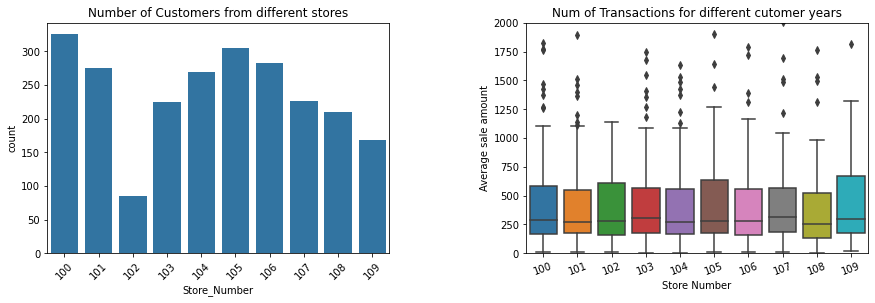

In [40]:
plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.countplot(data=cust_df, x = 'Store_Number', color=base_color);
plt.xticks(rotation=45)
plt.title('Number of Customers from different stores')

plt.subplot(1, 2, 2)
sns.boxplot(data=cust_df, x='Store_Number', y='Avg_Sale_Amount')
plt.ylim(0,2000)
plt.xlabel('Store Number')
plt.ylabel('Average sale amount')
plt.xticks(rotation=20)
plt.title('Average sales in each store');



plt.title('Num of Transactions for different cutomer years')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

* The average sales amount in different stores seems to be relatively stable and does not depend on how many people buy from each store

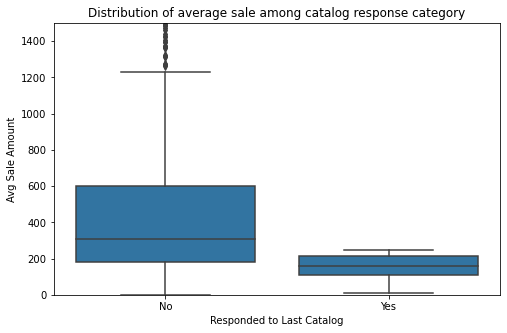

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(data=cust_df, x='Responded_to_Last_Catalog', y='Avg_Sale_Amount', color = base_color)
plt.ylim(0,1500)
plt.xlabel('Responded to Last Catalog')
plt.ylabel('Avg Sale Amount')
plt.title('Distribution of average sale among catalog response category');

* People that do not repond to catalog buys more on average that those people that responds to it

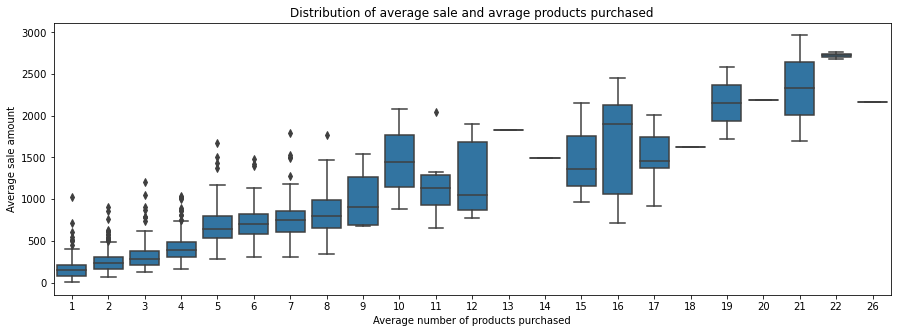

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(data=cust_df, x='Avg_Num_Products_Purchased', y='Avg_Sale_Amount', color = base_color)

plt.xlabel('Average number of products purchased')
plt.ylabel('Average sale amount')
plt.title('Distribution of average sale and avrage products purchased');

* Average sale amount increses with average umber of products purchased. 
* This looks intuitive enough

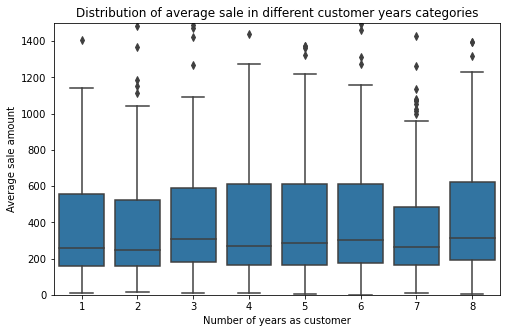

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(data=cust_df, x='No_of_Years_as_Customer', y='Avg_Sale_Amount', color=base_color)
plt.ylim(0,1500)
plt.xlabel('Number of years as customer')
plt.ylabel('Average sale amount')
plt.title('Distribution of average sale in different customer years categories');

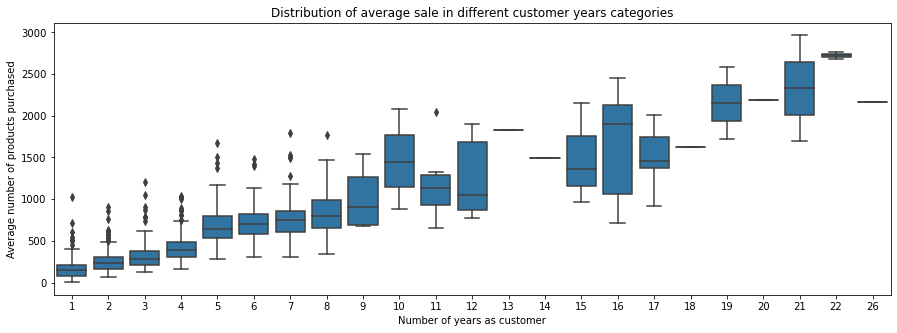

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(data=cust_df, x='Avg_Num_Products_Purchased', y='Avg_Sale_Amount', color = base_color)

plt.xlabel('Number of years as customer')
plt.ylabel('Average number of products purchased')
plt.titlex('Distribution of average sale in different customer years categories');

* Cutomers that have spent 3, 4, 4, 6, and 8 years have similar inter quartile range 
* Customers within the range of 1, 2, and 7 years have the lowest minimum number of purchase

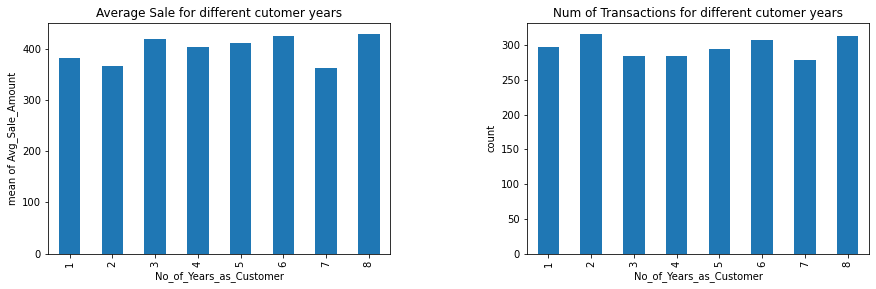

In [36]:
plt.subplot(1, 2, 1)
cust_df.groupby('No_of_Years_as_Customer').mean()['Avg_Sale_Amount'].plot(kind='bar')
plt.xticks(rotation = 90)
plt.ylabel('mean of Avg_Sale_Amount')
plt.title('Average Sale for different cutomer years')

plt.subplot(1, 2, 2)
cust_df.groupby('No_of_Years_as_Customer').count()['Avg_Sale_Amount'].plot(kind='bar')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Num of Transactions for different cutomer years')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

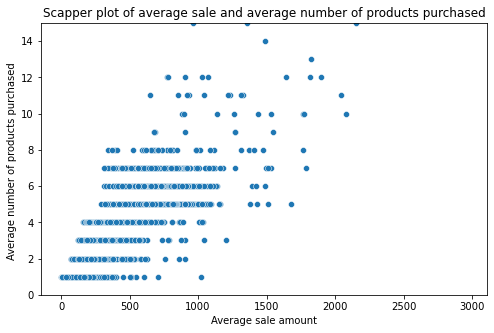

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=cust_df, x='Avg_Sale_Amount', y='Avg_Num_Products_Purchased')
plt.ylim(0,15)
plt.xlabel('Average sale amount')
plt.ylabel('Average number of products purchased ')
plt.title('Scapper plot of average sale and average number of products purchased');

Although there are more people in the store mailing list, the loyalty club has more purchasing power than the store mailing list

In [41]:
cust_df.groupby('Customer_Segment').count()['Avg_Sale_Amount']


Customer_Segment
Credit Card Only                 494
Loyalty Club Only                579
Loyalty Club and Credit Card     194
Store Mailing List              1108
Name: Avg_Sale_Amount, dtype: int64

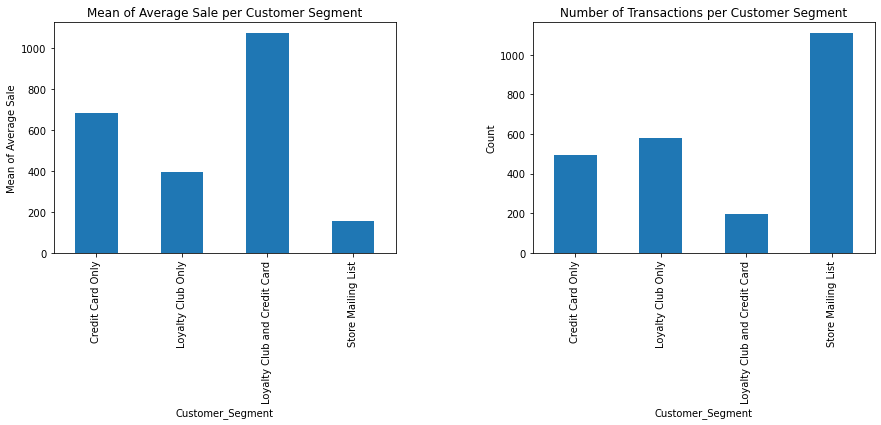

In [42]:
plt.subplot(1, 2, 1)
cust_df.groupby('Customer_Segment').mean()['Avg_Sale_Amount'].plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('Mean of Average Sale per Customer Segment')
plt.ylabel('Mean of Average Sale')

plt.subplot(1, 2, 2)
cust_df.groupby('Customer_Segment').count()['Avg_Sale_Amount'].plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('Number of Transactions per Customer Segment')
plt.ylabel('Count')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

* People with credit card pay more but they don't have the highest number of transactions
* Although the customers on the store mailing list have the highest number of transactions, it does not translate to average sale

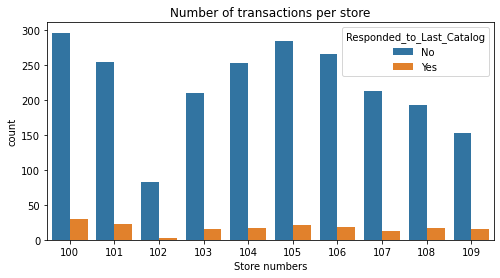

In [43]:
plt.figure(figsize=(8, 4))
sns.countplot(data=cust_df, x= 'Store_Number', hue='Responded_to_Last_Catalog')
plt.xticks(rotation = 0)
plt.title('Number of transactions per store')
plt.xlabel('Store numbers')
plt.ylabel('count');

* As expected the number of customers that attended to last catalog is lower that those that did not in all stores

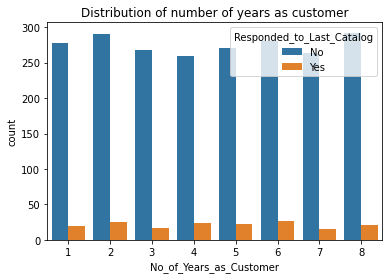

In [44]:
#set_bins = np.arange(1, 9, 1)
sns.countplot(data=cust_df, x='No_of_Years_as_Customer', hue='Responded_to_Last_Catalog')
plt.title('Distribution of number of years as customer');

* As expected the number of customers that attended to last catalog is lower that those that did not among different number of years among customers

### Multivariate Visualization

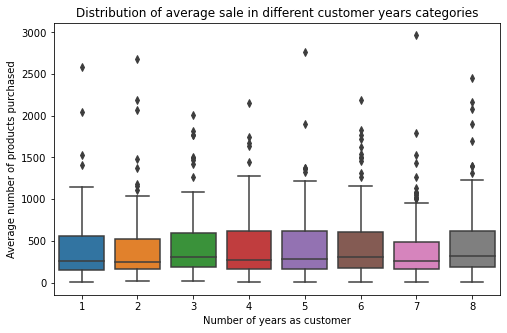

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(data=cust_df, x='No_of_Years_as_Customer', y='Avg_Sale_Amount')

plt.xlabel('Number of years as customer')
plt.ylabel('Average number of products purchased')
plt.title('Distribution of average sale in different customer years categories');